### Also learnt about padding and strides in CNN 

In [6]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

In [4]:
X_train = X_train / 255
X_test = X_test / 255

In [5]:
X_train.shape

(60000, 28, 28)

In [8]:
cnn = keras.Sequential([
    keras.layers.Conv2D(filters=16, kernel_size=(2, 2), padding='same', activation='leaky_relu', input_shape=(28, 28, 1)),
    keras.layers.MaxPooling2D((2, 2)),

    keras.layers.Flatten(),
    keras.layers.Dense(64, activation='leaky_relu'),
    keras.layers.Dense(10, activation='softmax')
])

cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

cnn.fit(X_train, y_train, epochs=10)


Epoch 1/10


1875/1875 [==============================] - 8s 4ms/step - loss: 0.2191 - accuracy: 0.9359
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0797 - accuracy: 0.9758
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0562 - accuracy: 0.9829
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0418 - accuracy: 0.9872
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0322 - accuracy: 0.9897
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0255 - accuracy: 0.9922
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0200 - accuracy: 0.9937
Epoch 8/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0157 - accuracy: 0.9948
Epoch 9/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0131 - accuracy: 0.9961
Epoch 10/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.

313/313 [==============================] - 1s 2ms/step


Text(95.72222222222221, 0.5, 'Truth')

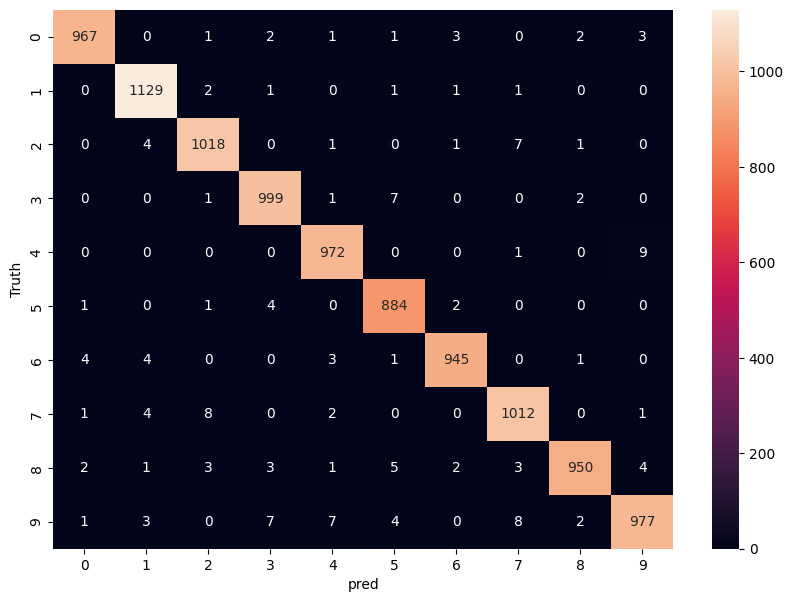

In [9]:
cnn.evaluate(X_test,y_test)
y_pred = cnn.predict(X_test)
y_pred_labels = [np.argmax(i) for i in y_pred]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred_labels)

plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('pred')
plt.ylabel('Truth')

In [10]:
from sklearn.metrics import classification_report, mean_squared_error, mean_absolute_error, r2_score, accuracy_score, confusion_matrix

mse = mean_squared_error(y_test, y_pred_labels)
print("Mean Squared Error:", mse)

mae = mean_absolute_error(y_test, y_pred_labels)
print("Mean Absolute Error:", mae)

r2 = r2_score(y_test, y_pred_labels)
print("R-squared:", r2)

a = accuracy_score(y_test, y_pred_labels)
print("Accuracy Score:", a)

cm= confusion_matrix(y_test, y_pred_labels)
print("Confusion Matrix : ")
print(cm)

print("Full report : ")
print(classification_report(y_test, y_pred_labels))

Mean Squared Error: 0.3136
Mean Absolute Error: 0.0602
R-squared: 0.962600756912023
Accuracy Score: 0.9853
Confusion Matrix : 
[[ 967    0    1    2    1    1    3    0    2    3]
 [   0 1129    2    1    0    1    1    1    0    0]
 [   0    4 1018    0    1    0    1    7    1    0]
 [   0    0    1  999    1    7    0    0    2    0]
 [   0    0    0    0  972    0    0    1    0    9]
 [   1    0    1    4    0  884    2    0    0    0]
 [   4    4    0    0    3    1  945    0    1    0]
 [   1    4    8    0    2    0    0 1012    0    1]
 [   2    1    3    3    1    5    2    3  950    4]
 [   1    3    0    7    7    4    0    8    2  977]]
Full report : 
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.99      0.99      1032
           3       0.98      0.99      0.99      1010
           4       0.98      0.99      0.99       982
  